In [32]:
import cv2,os

data_path=r'C:\Users\Acer\Desktop\face mask detector\face-mask-detection-keras-master\dataset\train\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [33]:
img_size=200
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [35]:
import numpy as np

data=np.array(data)
data=data/255
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

from sklearn.utils import shuffle
data,Label = shuffle(data,new_target, random_state=2)
train_data = [data,Label]


In [36]:

print(train_data[1].shape)
print(data.shape[1:])


(1376, 2)
(200, 200, 1)


In [37]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(200,200,1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
print(len(target))

1376


In [39]:
history=model.fit(train_data[0],train_data[1],epochs=80)

Train on 1376 samples
Epoch 1/80
1376/1376 [==============================] - 8s 6ms/sample - loss: 5.0027 - acc: 0.5065
Epoch 2/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.6352 - acc: 0.6962
Epoch 3/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.7485 - acc: 0.6751
Epoch 4/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.4539 - acc: 0.7754
Epoch 5/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.4500 - acc: 0.7849
Epoch 6/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.4360 - acc: 0.8031
Epoch 7/80
1376/1376 [==============================] - 7s 5ms/sample - loss: 0.3822 - acc: 0.8169
Epoch 8/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.3307 - acc: 0.8503
Epoch 9/80
1376/1376 [==============================] - 6s 4ms/sample - loss: 0.2833 - acc: 0.8750
Epoch 10/80
1376/1376 [==============================] - 5s 4ms/sample - loss: 0.2909 -

In [40]:
import cv2,os

data_path=r'C:\Users\Acer\Desktop\ml coding workshop\Mask_Datasets\train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Mask': 0, 'No_mask': 1}
['Mask', 'No_mask']
[0, 1]


In [41]:
img_size=200
data1=[]
target1=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data1.append(resized)
            target1.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [42]:
data1=np.array(data1)/255.0
data1=np.reshape(data1,(data1.shape[0],img_size,img_size,1))
target1=np.array(target1)

from keras.utils import np_utils

new_target1=np_utils.to_categorical(target1)

In [43]:
model.evaluate(data1,new_target1)

749/749 [==============================] - 2s 3ms/sample - loss: 1.2995 - acc: 0.7677


[1.2994976937372948, 0.76769024]

In [113]:

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [114]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(200,200))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,200,200,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [44]:
from PIL import Image

path3=r"C:\Users\Acer\Desktop\ml coding workshop\testing"
path4=r"C:\Users\Acer\Desktop\ml coding workshop\testing1"
list1 = os.listdir(path3)
print(list1)

for file in list1:
    im = Image.open(path3 + '\\' + file)  
    img = im.resize((200,200))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path4 +'\\' +  file, "JPEG")


['0-with-mask.jpg', '0.jpg', '1-with-mask.jpg', '1.jpg', '14-with-mask.jpg', '14.jpg', '15730.jpg', '17.jpg', '18.jpg', '2-with-mask.jpg', '2.jpg', '3-with-mask.jpg', '3.jpg', '4.jpg', '7-with-mask.jpg', 'WIN_20200517_22_34_47_Pro.jpg', 'WIN_20200520_17_15_08_Pro.jpg']


[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]


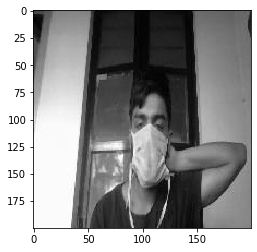

In [45]:
import matplotlib.pyplot as plt
iml = os.listdir(path4)
for im in iml:
    im1 = np.array(Image.open(path4 + '\\'+ im)) 
    img=im1.reshape(200,200)
    plt.imshow(img)
    plt.imshow(img,cmap='gray')
    X_train1 = im1.reshape(1,200, 200,1)
    X_train1 / 255
    classes=model.predict(X_train1)
    print(classes[0])
    


array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.99607843],
         [0.93333333],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [0.99215686],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.97254902],
         [0.98823529],
         [0.9372549 ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]]])

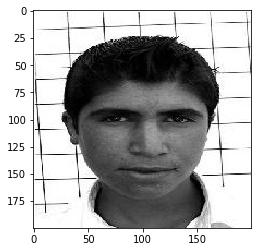

In [48]:
    im1 = np.array(Image.open(path4 + '\\'+ iml[10])) 
    img=im1.reshape(200,200)
    plt.imshow(img)
    plt.imshow(img,cmap='gray')
    X_train1 = im1.reshape(1,200, 200,1)
    X_train1 / 255

In [49]:
classes=model.predict(X_train1)
print(classes[0])


[0. 1.]
